In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

# Find a nice dataset
After a significant amount of searching for a good dataset, my dataset journy ended on this clean and beautiful dataset.
This is the kaggle link of our dataset: https://www.kaggle.com/rahulsingh731/classify-points-using-deep-learning-beginner

### Loading the dataset

In [2]:
features = pd.read_csv("features.csv")

In [3]:
target = pd.read_csv("target.csv")

# Data Description
OK, time to open the mystery box.<br>
The Data consists of two features namely f1 and f2.<br>
Based on the correlation between the two features our output label Y is defined.

We have total of 2250 2D datapoints with there corresponding label.

In [4]:
pd.concat([features, target], axis=1, join='inner')

,f1,f2,label
0,0.574727,0.787277,0
1,0.251502,0.908940,0
2,1.860578,0.013763,1
3,0.019477,1.047210,0
4,0.029794,0.252236,1
...,...,...,...
2245,1.694862,0.031078,1
2246,-0.015928,-0.145282,1
2247,0.441794,-0.387912,1
2248,0.219570,-0.117130,1


# Spliting the dataset into training and testing data.

In [5]:
# We will use GridSearchCV() for cross validation so we need only Train and Test datasets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=4, stratify=target)

In [6]:
print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of y_train =", y_train.shape)
print("Shape of y_test =", y_test.shape)

Shape of X_train = (1800, 2)
Shape of X_test = (450, 2)
Shape of y_train = (1800, 1)
Shape of y_test = (450, 1)


# Drafting the problem statement
Our Task is to find the relation between f1 and f2 and predict the label Y.

# Some EDA before deep diving into ML models

Let's see how our dataset looks like and what we have done in train test split.

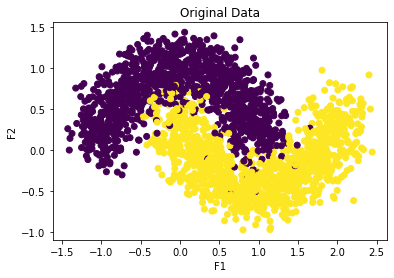

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=target.iloc[:,0])
plt.title("Original Data")
plt.xlabel("F1")
plt.ylabel('F2')
plt.show()

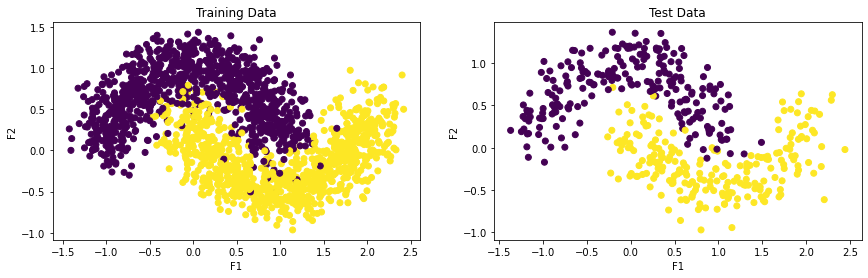

In [8]:
plt.figure(figsize=(14.5,4))
plt.subplot(121)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train.iloc[:,0])
plt.title("Training Data")
plt.xlabel("F1")
plt.ylabel('F2')

plt.subplot(122)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test.iloc[:,0])
plt.title("Test Data")
plt.xlabel("F1")
plt.ylabel('F2')

plt.show()

# Building ML models on Train Dataset
Our Approach:<br>
From above plots we can get a good idea about our dataset.<br>
It is clear that datapoints are not linearly seperable.<br>
The good news is that our dataset is Balanced.

So we will Apply 2 different types of ML models on this dataset and compare the results.<br>
1: Classic ML model -- Logistic Regression<br>
2: Deep learning based model -- Basic Neural Network.

### 1: Logistic regression

In [9]:
# Hyperparameter tunning
LogisticReg = LogisticRegression()
                        
parameters = {'C': [0.0001, 0.001, 0.01, 0.5, 1, 5, 10, 50, 100]}
GridSearch = GridSearchCV(LogisticReg, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
GridSearch.fit(X_train, y_train)

results = pd.DataFrame.from_dict(GridSearch.cv_results_)

In [10]:
res = results[["param_C", "mean_train_score", "mean_test_score", "rank_test_score" ]]
res['diff'] = res['mean_train_score'] - res['mean_test_score']
res

,param_C,mean_train_score,mean_test_score,rank_test_score,diff
0,0.0001,0.905529,0.905799,9,-0.000270
1,0.001,0.910381,0.910584,8,-0.000203
2,0.01,0.930302,0.930240,7,0.000062
3,0.5,0.945855,0.945670,2,0.000185
4,1,0.945893,0.945711,1,0.000182
5,5,0.945840,0.945592,3,0.000248
6,10,0.945829,0.945585,4,0.000244
7,50,0.945805,0.945573,5,0.000231
8,100,0.945797,0.945570,6,0.000227


### ROC curve for Test Data

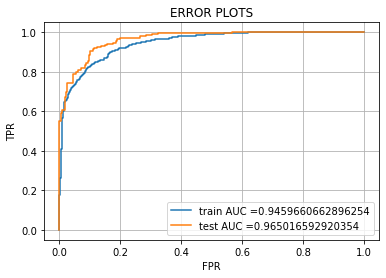

In [11]:
# Now using best hyperparameter value and plotting error plot to see the performance of the model.

LogisticRegTest = LogisticRegression(C=1)
LogisticRegTest.fit(X_train, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = LogisticRegTest.predict_proba(X_train)
y_test_pred = LogisticRegTest.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1]) # calculating TFR and FPR to plot the error graph
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [12]:
y_test_pred_values = LogisticRegTest.predict(X_test)

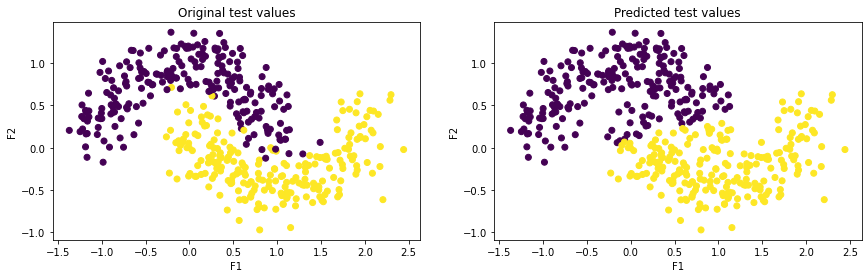

In [13]:
plt.figure(figsize=(14.5,4))

plt.subplot(121)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test.iloc[:,0])
plt.title("Original test values")
plt.xlabel("F1")
plt.ylabel('F2')

plt.subplot(122)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test_pred_values)
plt.title("Predicted test values")
plt.xlabel("F1")
plt.ylabel('F2')

plt.show()
# Final results of what actally our model has predicted.

# Neural Network: Multi layerd Perceptrons model

In [14]:
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import HeUniform

In [19]:
#Input layer
input_layer = Input(shape=(2,))

#Dense hidden layers
layer1 = Dense(6,activation='relu',kernel_initializer=HeUniform())(input_layer)
layer2 = Dense(5,activation='relu',kernel_initializer=HeUniform())(layer1)
layer3 = Dense(5,activation='relu',kernel_initializer=HeUniform())(layer2)
layer4 = Dense(4,activation='relu',kernel_initializer=HeUniform())(layer3)
layer5 = Dense(4,activation='relu',kernel_initializer=HeUniform())(layer4)

#output layer
output = Dense(1,activation='sigmoid',kernel_initializer=HeUniform())(layer5)

#Creating a model
My_Neural_Net = Model(inputs=input_layer,outputs=output)
My_Neural_Net.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
My_Neural_Net.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5   

In [20]:
My_Neural_Net.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.4533 - val_loss: 0.6813 - val_accuracy: 0.5022
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.5500 - val_loss: 0.6565 - val_accuracy: 0.6556
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6844 - val_loss: 0.6193 - val_accuracy: 0.6533
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6672 - val_loss: 0.5936 - val_accuracy: 0.6844
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.6772 - val_loss: 0.5771 - val_accuracy: 0.6844
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.6839 - val_loss: 0.5617 - val_accuracy: 0.6889
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.6911 - val_loss: 0.5486 - val_accuracy: 0.6978
Epoch 8/100
5

Epoch 59/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9661 - val_loss: 0.0969 - val_accuracy: 0.9756
Epoch 60/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9661 - val_loss: 0.0959 - val_accuracy: 0.9756
Epoch 61/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9656 - val_loss: 0.0952 - val_accuracy: 0.9756
Epoch 62/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9650 - val_loss: 0.0945 - val_accuracy: 0.9756
Epoch 63/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9650 - val_loss: 0.0940 - val_accuracy: 0.9756
Epoch 64/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9667 - val_loss: 0.0924 - val_accuracy: 0.9756
Epoch 65/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9656 - val_loss: 0.0944 - val_accuracy: 0.9756
Epoch 

In [21]:
y_test_pred_NN = My_Neural_Net.predict(X_test)

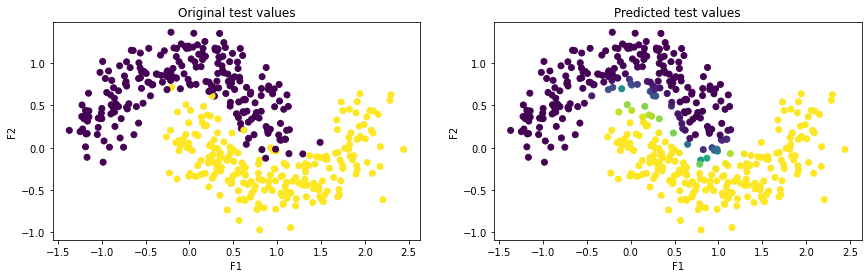

In [22]:
plt.figure(figsize=(14.5,4))

plt.subplot(121)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test.iloc[:,0])
plt.title("Original test values")
plt.xlabel("F1")
plt.ylabel('F2')

plt.subplot(122)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test_pred_NN)
plt.title("Predicted test values")
plt.xlabel("F1")
plt.ylabel('F2')

plt.show()

# Which evaluation metric did I choose and why?

1: Why ROC AUC score for Logistic regression?<br>
A: ROC AUC summarize the actual trade-off between the true positive rate and the predictive value for a predictive model using different probability thresholds which is an important aspect of classification problems.<br>

2: Accuracy for Neural Network.<br>
A: We know NN works very good on balanced dataset and accuracy is easy to calculate an interpret.
